In [3]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib
!pip install mlxtend





[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
basket=pd.read_csv("Data\groceries.csv",header=None)
basket.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
basket.shape

(9835, 32)

In [4]:
basket=basket.astype(str)
groceries_list=np.unique(basket.values)
groceries_unique_list=groceries_list[groceries_list!='nan']
print(groceries_unique_list)
print()
print("Total Number Of Unique Items In Market Is :",groceries_unique_list.size)

['Instant food products' 'UHT-milk' 'abrasive cleaner' 'artif. sweetener'
 'baby cosmetics' 'baby food' 'bags' 'baking powder' 'bathroom cleaner'
 'beef' 'berries' 'beverages' 'bottled beer' 'bottled water' 'brandy'
 'brown bread' 'butter' 'butter milk' 'cake bar' 'candles' 'candy'
 'canned beer' 'canned fish' 'canned fruit' 'canned vegetables' 'cat food'
 'cereals' 'chewing gum' 'chicken' 'chocolate' 'chocolate marshmallow'
 'citrus fruit' 'cleaner' 'cling film/bags' 'cocoa drinks' 'coffee'
 'condensed milk' 'cooking chocolate' 'cookware' 'cream' 'cream cheese'
 'curd' 'curd cheese' 'decalcifier' 'dental care' 'dessert' 'detergent'
 'dish cleaner' 'dishes' 'dog food' 'domestic eggs'
 'female sanitary products' 'finished products' 'fish' 'flour'
 'flower (seeds)' 'flower soil/fertilizer' 'frankfurter' 'frozen chicken'
 'frozen dessert' 'frozen fish' 'frozen fruits' 'frozen meals'
 'frozen potato products' 'frozen vegetables' 'fruit/vegetable juice'
 'grapes' 'hair spray' 'ham' 'hamburg

In [5]:
from mlxtend.preprocessing import TransactionEncoder
groceries = basket.values
encoder = TransactionEncoder()
onehot = encoder.fit_transform(groceries)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_).drop('nan',axis=1)
onehot_df=onehot_df.astype(int)
onehot_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
purchased_items=onehot_df.sum().sort_values(ascending=False).reset_index()
purchased_items.columns=["Item_Name","Item_Count"]
print(purchased_items.head())
print()
total_item_count=purchased_items["Item_Count"].sum()
print("Total items sold :",total_item_count)

          Item_Name  Item_Count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372

Total items sold : 43367


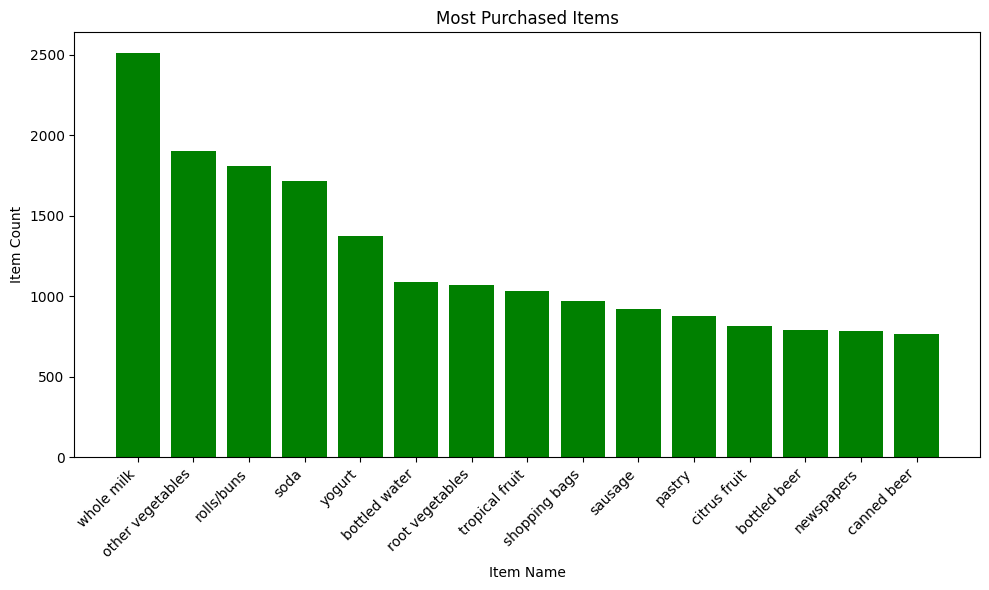

In [7]:
plt.figure(figsize=(10,6))
plt.bar(purchased_items['Item_Name'].head(15),purchased_items['Item_Count'].head(15),color="green")
plt.title('Most Purchased Items')
plt.xlabel('Item Name')
plt.ylabel('Item Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

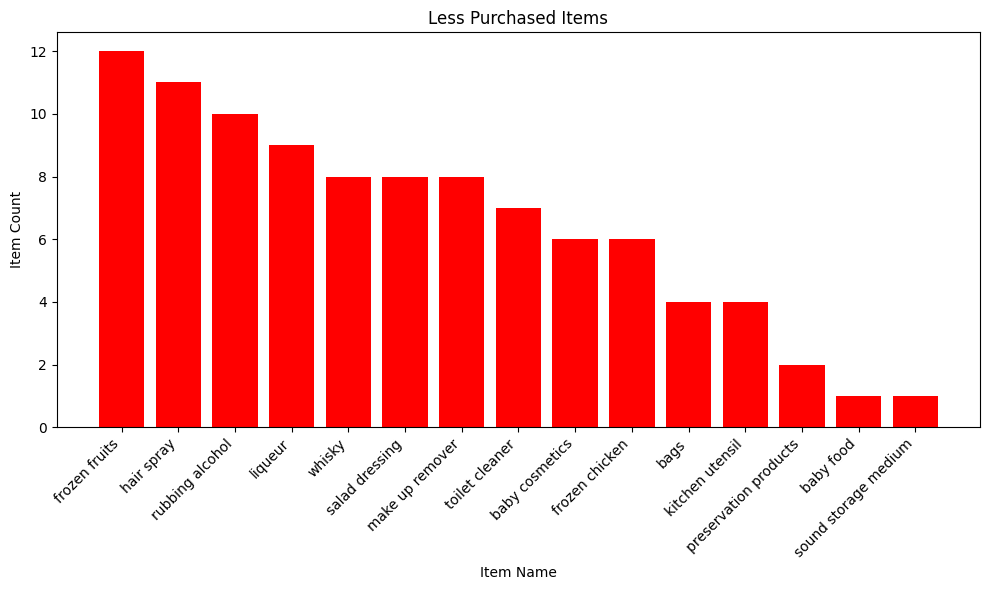

In [8]:
plt.figure(figsize=(10,6))
plt.bar(purchased_items['Item_Name'].tail(15),purchased_items['Item_Count'].tail(15),color="red")
plt.title('Less Purchased Items')
plt.xlabel('Item Name')
plt.ylabel('Item Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
corr=onehot_df.corr()
corr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Instant food products,1.000000,0.008598,-0.005378,-0.005141,-0.002223,-0.000907,-0.001815,0.013845,-0.004721,0.019695,...,0.017214,0.006884,-0.000215,0.005904,-0.002568,0.026516,-0.012528,0.025631,0.009795,0.033731
UHT-milk,0.008598,1.000000,-0.011118,0.029089,-0.004596,-0.001876,-0.003753,0.013637,0.011853,-0.008271,...,0.014629,0.013074,0.024576,0.014065,-0.005308,-0.002391,-0.013479,-0.058426,0.044235,0.025421
abrasive cleaner,-0.005378,-0.011118,1.000000,0.026568,-0.001477,-0.000603,-0.001205,-0.008020,0.029497,0.031886,...,-0.005412,0.037635,0.005816,0.036346,-0.001705,0.012982,0.004182,0.027627,0.025220,-0.004986
artif. sweetener,-0.005141,0.029089,0.026568,1.000000,-0.001412,-0.000576,-0.001152,0.032963,-0.002998,-0.005436,...,-0.005174,0.017582,-0.002135,-0.008955,-0.001630,0.005806,-0.007954,0.011558,0.033681,-0.004767
baby cosmetics,-0.002223,-0.004596,-0.001477,-0.001412,1.000000,-0.000249,-0.000498,0.027920,-0.001296,-0.005814,...,-0.002237,-0.002000,0.016481,0.009097,-0.000705,0.015327,-0.003440,0.013850,-0.009948,-0.002062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.026516,-0.002391,0.012982,0.005806,0.015327,0.048104,-0.004228,0.029481,-0.001321,0.018802,...,0.014840,0.008224,0.050277,0.047744,-0.005981,1.000000,-0.010647,0.072230,0.045665,-0.005270
white wine,-0.012528,-0.013479,0.004182,-0.007954,-0.003440,-0.001404,-0.002808,0.003906,-0.007305,0.003970,...,-0.004319,-0.002008,-0.020088,-0.024256,0.022142,-0.010647,1.000000,-0.037180,-0.013079,-0.011617
whole milk,0.025631,-0.058426,0.027627,0.011558,0.013850,-0.005908,-0.000255,0.082301,-0.004005,0.080670,...,0.040381,0.027970,0.034458,0.123684,-0.008538,0.072230,-0.037180,1.000000,0.134862,-0.001055
yogurt,0.009795,0.044235,0.025220,0.033681,-0.009948,0.025045,0.006433,0.046140,0.023744,0.056620,...,0.038683,0.033111,0.032467,0.120193,-0.001194,0.045665,-0.013079,0.134862,1.000000,0.015986


In [11]:
pos_corr=corr.where(corr>0,0)
pos_corr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Instant food products,1.000000,0.008598,0.000000,0.000000,0.000000,0.000000,0.000000,0.013845,0.000000,0.019695,...,0.017214,0.006884,0.000000,0.005904,0.000000,0.026516,0.000000,0.025631,0.009795,0.033731
UHT-milk,0.008598,1.000000,0.000000,0.029089,0.000000,0.000000,0.000000,0.013637,0.011853,0.000000,...,0.014629,0.013074,0.024576,0.014065,0.000000,0.000000,0.000000,0.000000,0.044235,0.025421
abrasive cleaner,0.000000,0.000000,1.000000,0.026568,0.000000,0.000000,0.000000,0.000000,0.029497,0.031886,...,0.000000,0.037635,0.005816,0.036346,0.000000,0.012982,0.004182,0.027627,0.025220,0.000000
artif. sweetener,0.000000,0.029089,0.026568,1.000000,0.000000,0.000000,0.000000,0.032963,0.000000,0.000000,...,0.000000,0.017582,0.000000,0.000000,0.000000,0.005806,0.000000,0.011558,0.033681,0.000000
baby cosmetics,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.027920,0.000000,0.000000,...,0.000000,0.000000,0.016481,0.009097,0.000000,0.015327,0.000000,0.013850,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.026516,0.000000,0.012982,0.005806,0.015327,0.048104,0.000000,0.029481,0.000000,0.018802,...,0.014840,0.008224,0.050277,0.047744,0.000000,1.000000,0.000000,0.072230,0.045665,0.000000
white wine,0.000000,0.000000,0.004182,0.000000,0.000000,0.000000,0.000000,0.003906,0.000000,0.003970,...,0.000000,0.000000,0.000000,0.000000,0.022142,0.000000,1.000000,0.000000,0.000000,0.000000
whole milk,0.025631,0.000000,0.027627,0.011558,0.013850,0.000000,0.000000,0.082301,0.000000,0.080670,...,0.040381,0.027970,0.034458,0.123684,0.000000,0.072230,0.000000,1.000000,0.134862,0.000000
yogurt,0.009795,0.044235,0.025220,0.033681,0.000000,0.025045,0.006433,0.046140,0.023744,0.056620,...,0.038683,0.033111,0.032467,0.120193,0.000000,0.045665,0.000000,0.134862,1.000000,0.015986
